In [1]:
import pandas as pd

# Load Dataset
patients = pd.read_csv('hosp/patients.csv')
admissions = pd.read_csv('hosp/admissions.csv')
diagnoses_icd = pd.read_csv('hosp/diagnoses_icd.csv')
d_icd_diagnoses = pd.read_csv('hosp/d_icd_diagnoses.csv')

# Print column names and data types for each file
print("=== patients.csv ===")
print(patients.dtypes)
print("\n")

print("=== admissions.csv ===")
print(admissions.dtypes)
print("\n")

print("=== diagnoses_icd.csv ===")
print(diagnoses_icd.dtypes)
print("\n")

print("=== d_icd_diagnoses.csv ===")
print(d_icd_diagnoses.dtypes)


=== patients.csv ===
subject_id            int64
gender               object
anchor_age            int64
anchor_year           int64
anchor_year_group    object
dod                  object
dtype: object


=== admissions.csv ===
subject_id               int64
hadm_id                  int64
admittime               object
dischtime               object
deathtime               object
admission_type          object
admit_provider_id       object
admission_location      object
discharge_location      object
insurance               object
language                object
marital_status          object
race                    object
edregtime               object
edouttime               object
hospital_expire_flag     int64
dtype: object


=== diagnoses_icd.csv ===
subject_id      int64
hadm_id         int64
seq_num         int64
icd_code       object
icd_version     int64
dtype: object


=== d_icd_diagnoses.csv ===
icd_code       object
icd_version     int64
long_title     object
dtype: object


Step 1: Load and Filter for Asthma Patients in your EDA.

In [2]:
import pandas as pd

# Step 1: Load datasets
patients = pd.read_csv('hosp/patients.csv')
admissions = pd.read_csv('hosp/admissions.csv')
diagnoses_icd = pd.read_csv('hosp/diagnoses_icd.csv')
d_icd_diagnoses = pd.read_csv('hosp/d_icd_diagnoses.csv')

# Step 2: Merge ICD descriptions into diagnoses
diagnoses_full = diagnoses_icd.merge(d_icd_diagnoses, on=['icd_code', 'icd_version'], how='left')

# Step 3: Filter for asthma-related diagnoses (ICD-9: 493.*, ICD-10: J45*)
asthma_patients = diagnoses_full[
    diagnoses_full['icd_code'].str.startswith(('493', 'J45'))
]

# Check unique matches
print("Unique ICD asthma matches:", asthma_patients['long_title'].unique())

# Step 4: Get unique subject_ids with asthma
asthma_subject_ids = asthma_patients['subject_id'].unique()

# Step 5: Subset demographics and admissions for these patients
asthma_demo = patients[patients['subject_id'].isin(asthma_subject_ids)]
asthma_adm = admissions[admissions['subject_id'].isin(asthma_subject_ids)]

# Step 6: Merge for enriched patient table
asthma_cohort = asthma_demo.merge(asthma_adm, on='subject_id', how='left')

# Preview
print("Asthma cohort shape:", asthma_cohort.shape)
asthma_cohort.head()

Unique ICD asthma matches: ['Asthma, unspecified type, unspecified'
 'Chronic obstructive asthma, unspecified'
 'Chronic obstructive asthma with (acute) exacerbation'
 'Asthma, unspecified type, with (acute) exacerbation'
 'Unspecified asthma, uncomplicated' 'Other asthma'
 'Mild intermittent asthma, uncomplicated'
 'Moderate persistent asthma with (acute) exacerbation'
 'Unspecified asthma with (acute) exacerbation'
 'Extrinsic asthma, unspecified' 'Intrinsic asthma, unspecified'
 'Severe persistent asthma, uncomplicated'
 'Severe persistent asthma with (acute) exacerbation'
 'Extrinsic asthma with (acute) exacerbation'
 'Exercise induced bronchospasm' 'Mild persistent asthma, uncomplicated'
 'Mild intermittent asthma with (acute) exacerbation'
 'Moderate persistent asthma, uncomplicated'
 'Asthma, unspecified type, with status asthmaticus'
 'Unspecified asthma with status asthmaticus'
 'Mild persistent asthma with (acute) exacerbation'
 'Chronic obstructive asthma with status asthmat

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,admittime,dischtime,deathtime,...,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10001725,F,46,2110,2011 - 2013,NaN,25563031,2110-04-11 15:08:00,2110-04-14 15:00:00,NaN,...,P32W56,PACU,HOME,Private,English,MARRIED,WHITE,NaN,NaN,0
1,10001884,F,68,2122,2008 - 2010,2131-01-20,21192799,2130-10-05 20:04:00,2130-10-06 15:05:00,NaN,...,P99AKB,EMERGENCY ROOM,NaN,Medicare,English,MARRIED,BLACK/AFRICAN AMERICAN,2130-10-05 11:58:00,2130-10-06 15:05:00,0
2,10001884,F,68,2122,2008 - 2010,2131-01-20,21268656,2125-10-18 16:50:00,2125-10-20 15:15:00,NaN,...,P105PG,EMERGENCY ROOM,HOME,Medicare,English,MARRIED,BLACK/AFRICAN AMERICAN,2125-10-18 15:01:00,2125-10-18 18:30:00,0
3,10001884,F,68,2122,2008 - 2010,2131-01-20,21577720,2125-12-26 17:06:00,2125-12-27 16:52:00,NaN,...,P105PG,EMERGENCY ROOM,NaN,Medicare,English,MARRIED,BLACK/AFRICAN AMERICAN,2125-12-26 13:50:00,2125-12-26 18:17:00,0
4,10001884,F,68,2122,2008 - 2010,2131-01-20,22532141,2130-10-14 00:58:00,2130-10-14 13:57:00,NaN,...,P64RG9,EMERGENCY ROOM,NaN,Medicare,English,MARRIED,BLACK/AFRICAN AMERICAN,2130-10-13 21:00:00,2130-10-14 13:57:00,0


Step 2: Integrate CKD lab biomarkers

In [3]:
import pandas as pd

# Load Dataset
labevents = pd.read_csv('hosp/labevents.csv', nrows=5)
d_labitems = pd.read_csv('hosp/d_labitems.csv')

# Print column names and data types for each file
print("=== labevents.csv ===")
print(labevents.dtypes)
print("\n")

print("=== d_labitems.csv ===")
print(d_labitems.dtypes)
print("\n")

=== labevents.csv ===
labevent_id            int64
subject_id             int64
hadm_id              float64
specimen_id            int64
itemid                 int64
order_provider_id     object
charttime             object
storetime             object
value                 object
valuenum             float64
valueuom              object
ref_range_lower      float64
ref_range_upper      float64
flag                 float64
priority              object
comments              object
dtype: object


=== d_labitems.csv ===
itemid       int64
label       object
fluid       object
category    object
dtype: object




Get CKD Lab Test itemids

In [4]:
import pandas as pd

# Load lab item definitions
d_labitems = pd.read_csv('hosp/d_labitems.csv')

# Identify CKD-relevant test names
ckd_keywords = ['creatinine', 'bun', 'urea', 'egfr', 'protein', 'albumin', 'hemoglobin']

# Filter lab items based on name match
ckd_labitems = d_labitems[d_labitems['label'].str.lower().str.contains('|'.join(ckd_keywords), na=False)]

# Extract list of relevant itemids
ckd_itemids = ckd_labitems['itemid'].unique()

# Display for verification
print("CKD Lab Tests Identified:")
print(ckd_labitems[['itemid', 'label']])

CKD Lab Tests Identified:
      itemid                label
4      50805    Carboxyhemoglobin
9      50811           Hemoglobin
12     50814        Methemoglobin
33     50835     Albumin, Ascites
39     50841  Creatinine, Ascites
...      ...                  ...
1530   52703       Albumin, Urine
1556   53085              Albumin
1564   53096       Protein, Total
1580   53116            (Albumin)
1599   53138            (Albumin)

[95 rows x 2 columns]


Chunked Filtering of labevents.csv

In [5]:
import pandas as pd

# Load filtered asthma subject_ids from Step 1
asthma_subject_ids = set(asthma_cohort['subject_id'])

# File path to large labevents file
labevents_path = 'hosp/labevents.csv'

# Set chunk size
chunksize = 10**6

# Empty list to collect relevant rows
filtered_labs = []

# Read in chunks
for chunk in pd.read_csv(labevents_path, chunksize=chunksize):
    # Keep only rows matching asthma patients AND CKD lab tests
    mask = (chunk['subject_id'].isin(asthma_subject_ids)) & (chunk['itemid'].isin(ckd_itemids))
    filtered = chunk.loc[mask].dropna(subset=['valuenum'])  # remove missing values

    # Append filtered chunk
    filtered_labs.append(filtered)

# Combine all filtered rows into a single DataFrame
asthma_lab_events_clean = pd.concat(filtered_labs, ignore_index=True)

# Merge labels from d_labitems for clarity
asthma_lab_events_clean = asthma_lab_events_clean.merge(
    d_labitems[['itemid', 'label']], on='itemid', how='left'
)

# Preview result
print("Total CKD-related lab events for asthma patients:", asthma_lab_events_clean.shape)
asthma_lab_events_clean[['subject_id', 'label', 'valuenum', 'charttime']].head()


Total CKD-related lab events for asthma patients: (2429947, 17)


,subject_id,label,valuenum,charttime
0,10001725,Creatinine,0.8,2110-04-11 18:02:00
1,10001725,Urea Nitrogen,16.0,2110-04-11 18:02:00
2,10001725,Hemoglobin,13.9,2110-04-11 18:02:00
3,10001725,Creatinine,0.8,2110-04-12 02:59:00
4,10001725,Urea Nitrogen,18.0,2110-04-12 02:59:00


Step 3: Medication + Service Context for Asthma Cohort

In [6]:
# Load Dataset
prescriptions = pd.read_csv('hosp/prescriptions.csv', low_memory=False)
services = pd.read_csv('hosp/services.csv')


# Print column names and data types for each file
print("=== prescriptions.csv ===")
print(prescriptions.dtypes)
print("\n")

print("=== services.csv ===")
print(services.dtypes)

=== prescriptions.csv ===
subject_id             int64
hadm_id                int64
pharmacy_id            int64
poe_id                object
poe_seq              float64
order_provider_id     object
starttime             object
stoptime              object
drug_type             object
drug                  object
formulary_drug_cd     object
gsn                   object
ndc                  float64
prod_strength         object
form_rx               object
dose_val_rx           object
dose_unit_rx          object
form_val_disp         object
form_unit_disp        object
doses_per_24_hrs     float64
route                 object
dtype: object


=== services.csv ===
subject_id       int64
hadm_id          int64
transfertime    object
prev_service    object
curr_service    object
dtype: object


Chunked Extraction of Steroid & NSAID Prescriptions

In [7]:
import pandas as pd

# Define steroid and NSAID keywords
steroid_keywords = ['prednisone', 'prednisolone', 'methylprednisolone', 'dexamethasone', 'hydrocortisone']
nsaid_keywords = ['ibuprofen', 'naproxen', 'diclofenac', 'celecoxib', 'ketorolac']

# Convert subject_ids to set for fast lookup
asthma_ids_set = set(asthma_cohort['subject_id'])

# Set path and chunk size
rx_path = 'hosp/prescriptions.csv'
chunksize = 10**5  # Tune based on your system

# Container to store filtered results
filtered_rx_chunks = []

# Read in chunks
for chunk in pd.read_csv(rx_path, chunksize=chunksize, low_memory=False):
    chunk['drug_lower'] = chunk['drug'].astype(str).str.lower()

    # Filter by asthma patients
    chunk = chunk[chunk['subject_id'].isin(asthma_ids_set)]

    # Filter by drug keywords
    is_steroid = chunk['drug_lower'].str.contains('|'.join(steroid_keywords))
    is_nsaid = chunk['drug_lower'].str.contains('|'.join(nsaid_keywords))

    filtered = chunk[is_steroid | is_nsaid].copy()
    filtered['is_steroid'] = is_steroid
    filtered['is_nsaid'] = is_nsaid

    # Append
    filtered_rx_chunks.append(filtered)

# Concatenate all filtered chunks
asthma_rx_filtered = pd.concat(filtered_rx_chunks, ignore_index=True)

# Preview results
print("Filtered prescription records:", asthma_rx_filtered.shape)
asthma_rx_filtered[['subject_id', 'drug', 'is_steroid', 'is_nsaid', 'starttime']].head()

Filtered prescription records: (73079, 24)


,subject_id,drug,is_steroid,is_nsaid,starttime
0,10001725,Ibuprofen,False,True,2110-04-13 07:00:00
1,10001725,Ketorolac,False,True,2110-04-11 15:00:00
2,10001725,Ketorolac,False,True,2110-04-11 15:00:00
3,10001725,MethylPREDNISolone Sodium Succ,True,False,2110-04-11 15:00:00
4,10001725,Ketorolac,False,True,2110-04-11 18:00:00


Extract Service Context for Admissions

In [8]:
# Load services.csv
services = pd.read_csv('hosp/services.csv')

# Filter to asthma patients
asthma_services = services[services['subject_id'].isin(asthma_cohort['subject_id'])]

# Merge with admission context
asthma_service_context = asthma_cohort.merge(asthma_services, on=['subject_id', 'hadm_id'], how='left')

# Check frequency of current services
print("Top current services during admission:")
print(asthma_service_context['curr_service'].value_counts().head())

Top current services during admission:
curr_service
MED      53704
CMED      8593
SURG      7741
OMED      4821
ORTHO     4332
Name: count, dtype: int64


Step 4: Feature Engineering for Asthma-CKD Prediction

Step 4A: Aggregate CKD Biomarkers Per Patient

In [9]:
# Group and summarize CKD labs per patient
biomarker_summary = asthma_lab_events_clean.groupby(['subject_id', 'label'])['valuenum'].agg(['mean', 'min', 'max']).reset_index()

# Pivot to wide format: one row per patient
biomarker_pivot = biomarker_summary.pivot(index='subject_id', columns='label', values='mean').reset_index()

# Rename columns for easier access
biomarker_pivot.columns.name = None
biomarker_pivot = biomarker_pivot.rename(columns=lambda x: x.lower().replace(' ', '_') if isinstance(x, str) else x)

# Preview
biomarker_pivot.head()

,subject_id,%_hemoglobin_a1c,24_hr_creatinine,24_hr_protein,<albumin>,albumin,"albumin,_ascites","albumin,_body_fluid","albumin,_joint_fluid","albumin,_pleural",...,"total_protein,_body_fluid","total_protein,_csf","total_protein,_joint_fluid","total_protein,_pleural","total_protein,_urine",urea_nitrogen,"urea_nitrogen,_ascites","urea_nitrogen,_body_fluid","urea_nitrogen,_urine",urine_creatinine
0,10001725,5.742857,1022.5,NaN,NaN,4.838462,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.160714,NaN,NaN,276.0,43.0
1,10001884,NaN,NaN,NaN,NaN,3.943750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.635417,NaN,NaN,NaN,NaN
2,10002221,6.018750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.166667,NaN,NaN,NaN,NaN
3,10002800,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.466667,NaN,NaN,NaN,NaN
4,10003019,5.842857,NaN,NaN,NaN,3.485366,NaN,NaN,NaN,NaN,...,NaN,75.0,NaN,NaN,16.0,24.972727,NaN,NaN,NaN,NaN


Step 4B: Create Medication Exposure Flags

In [10]:
# Get binary flags per patient
rx_flags = asthma_rx_filtered.groupby('subject_id')[['is_steroid', 'is_nsaid']].max().reset_index()

# Preview
rx_flags.head()

,subject_id,is_steroid,is_nsaid
0,10001725,True,True
1,10001884,True,False
2,10002221,False,True
3,10002800,False,True
4,10003019,True,True


Step 4C: Encode Admission Service Info

In [11]:
# Get most common current service per subject
top_service = asthma_service_context.groupby('subject_id')['curr_service'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown').reset_index()

# Optional: one-hot encode services
top_service_dummies = pd.get_dummies(top_service['curr_service'], prefix='service')
top_service_encoded = pd.concat([top_service['subject_id'], top_service_dummies], axis=1)

# Preview
top_service_encoded.head()

,subject_id,service_CMED,service_CSURG,service_DENT,service_ENT,service_EYE,service_GU,service_GYN,service_MED,service_NMED,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_PSYCH,service_SURG,service_TRAUM,service_TSURG,service_VSURG
0,10001725,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,10001884,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,10002221,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,10002800,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,10003019,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


Step 4D: Merge All Features into One Master Table

In [12]:
# Start with demographic base
features_df = asthma_cohort[['subject_id', 'gender', 'anchor_age']].drop_duplicates()

# Merge engineered features
features_df = features_df.merge(biomarker_pivot, on='subject_id', how='left')
features_df = features_df.merge(rx_flags, on='subject_id', how='left')
features_df = features_df.merge(top_service_encoded, on='subject_id', how='left')

# Fill missing binary flags
features_df[['is_steroid', 'is_nsaid']] = features_df[['is_steroid', 'is_nsaid']].fillna(0)

# Final feature table preview
print("Final Feature Table:", features_df.shape)
features_df.head()

Final Feature Table: (22960, 74)


,subject_id,gender,anchor_age,%_hemoglobin_a1c,24_hr_creatinine,24_hr_protein,<albumin>,albumin,"albumin,_ascites","albumin,_body_fluid",...,service_NSURG,service_OBS,service_OMED,service_ORTHO,service_PSURG,service_PSYCH,service_SURG,service_TRAUM,service_TSURG,service_VSURG
0,10001725,F,46,5.742857,1022.5,NaN,NaN,4.838462,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,10001884,F,68,NaN,NaN,NaN,NaN,3.943750,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,10002221,F,68,6.018750,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,10002800,F,32,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,...,False,True,False,False,False,False,False,False,False,False
4,10003019,M,69,5.842857,NaN,NaN,NaN,3.485366,NaN,NaN,...,False,False,True,False,False,False,False,False,False,False


eGFR-based CKD stages

In [13]:
# CKD-EPI 2009 eGFR Computation
import numpy as np

# Normalize gender values
features_df['gender'] = features_df['gender'].str.upper().str.strip()

# Filter valid rows
features_df = features_df[
    (features_df['gender'].isin(['M', 'F'])) &
    (features_df['creatinine'].notna()) &
    (features_df['anchor_age'].notna())
]

# Define CKD-EPI formula
def compute_egfr(row):
    Scr = row['creatinine']
    age = row['anchor_age']
    gender = row['gender']

    if gender == 'F':
        k = 0.7
        alpha = -0.329
        multiplier = 1.018
    else:
        k = 0.9
        alpha = -0.411
        multiplier = 1.0

    min_ratio = min(Scr / k, 1)
    max_ratio = max(Scr / k, 1)

    return 141 * (min_ratio ** alpha) * (max_ratio ** -1.209) * (0.993 ** age) * multiplier

# Apply to DataFrame
features_df['egfr_ckd_epi'] = features_df.apply(compute_egfr, axis=1)

# Preview results
features_df[['subject_id', 'creatinine', 'anchor_age', 'gender', 'egfr_ckd_epi']].head()

,subject_id,creatinine,anchor_age,gender,egfr_ckd_epi
0,10001725,0.820000,46,F,85.813359
1,10001884,0.921875,68,F,63.819122
2,10002221,0.843478,68,F,71.058491
3,10002800,0.540000,32,F,124.859776
4,10003019,1.077679,69,M,69.842046


Step 5: Visualizations

Step 5A: Creatinine Distribution by Steroid Use

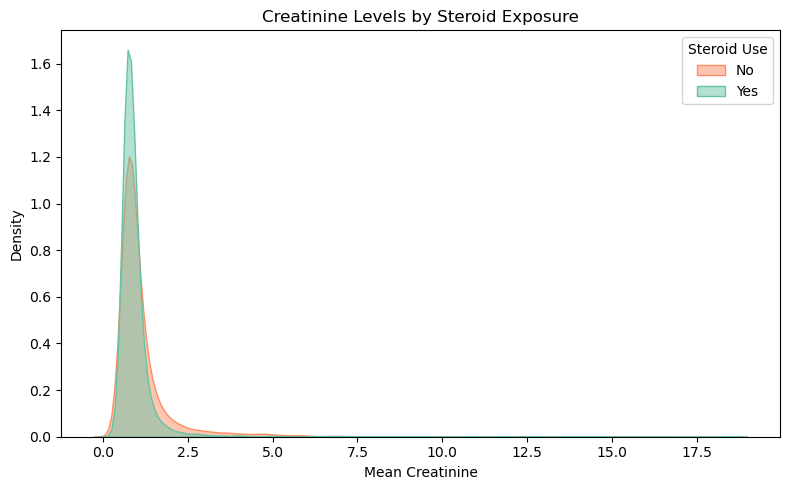

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(data=features_df, x='creatinine', hue='is_steroid', fill=True, common_norm=False, alpha=0.5, palette='Set2')
plt.title('Creatinine Levels by Steroid Exposure')
plt.xlabel('Mean Creatinine')
plt.ylabel('Density')
plt.legend(title='Steroid Use', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Step 5B: Boxplot: Urea Nitrogen by NSAID Exposure

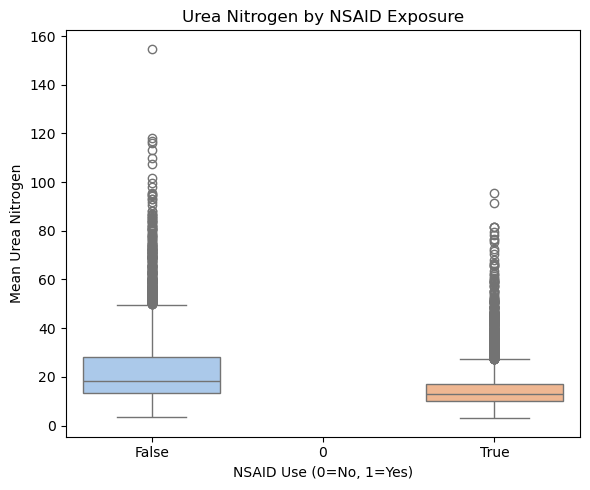

In [15]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='is_nsaid', y='urea_nitrogen', data=features_df, hue='is_nsaid', palette='pastel', legend=False)
plt.title('Urea Nitrogen by NSAID Exposure')
plt.xlabel('NSAID Use (0=No, 1=Yes)')
plt.ylabel('Mean Urea Nitrogen')
plt.tight_layout()
plt.show()

eGFR Visualizations

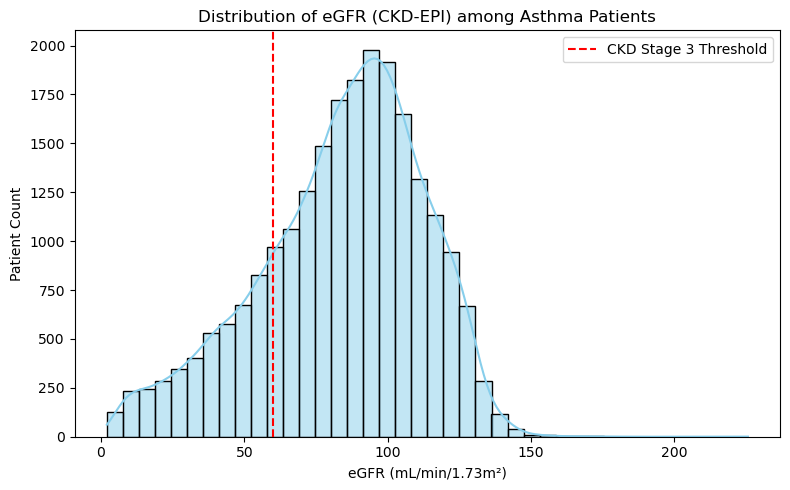

C:\Users\Dell Precision 7530\AppData\Local\Temp\ipykernel_9020\4003902172.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_steroid', y='egfr_ckd_epi', data=features_df, palette='Set2')


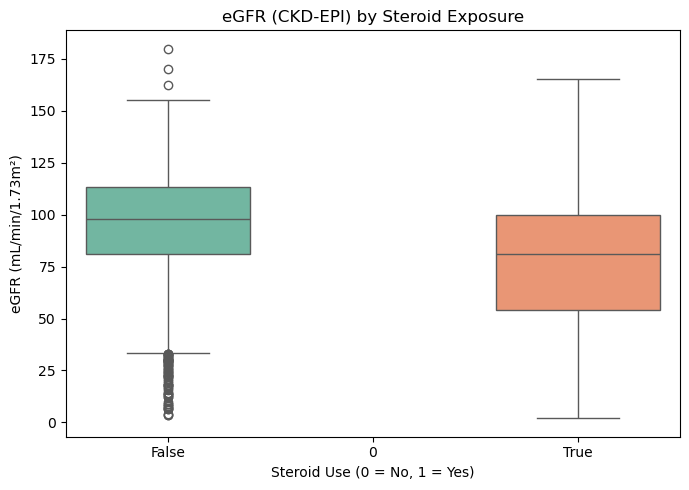

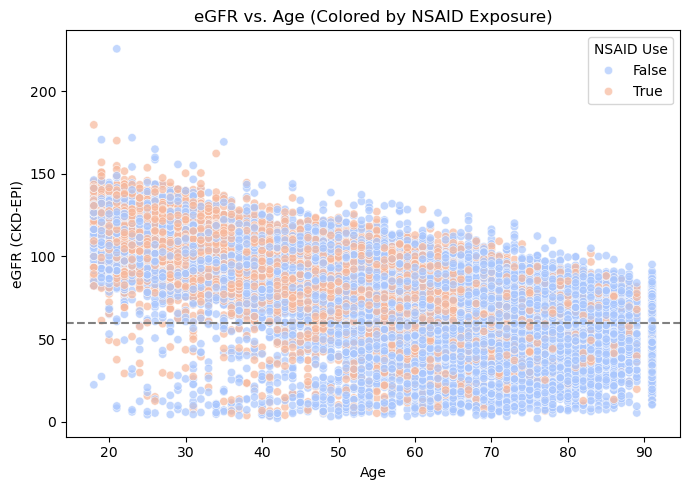

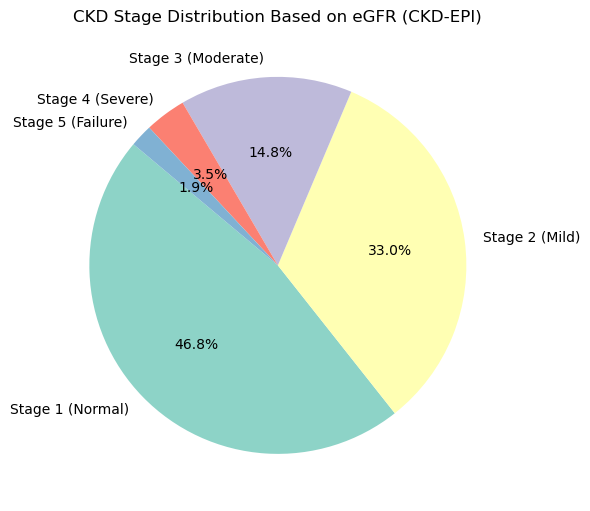

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of eGFR (CKD-EPI)
plt.figure(figsize=(8, 5))
sns.histplot(data=features_df, x='egfr_ckd_epi', bins=40, kde=True, color='skyblue')
plt.axvline(60, color='red', linestyle='--', label='CKD Stage 3 Threshold')
plt.title('Distribution of eGFR (CKD-EPI) among Asthma Patients')
plt.xlabel('eGFR (mL/min/1.73m²)')
plt.ylabel('Patient Count')
plt.legend()
plt.tight_layout()
plt.show()

# eGFR by Steroid Use
plt.figure(figsize=(7, 5))
sns.boxplot(x='is_steroid', y='egfr_ckd_epi', data=features_df, palette='Set2')
plt.title('eGFR (CKD-EPI) by Steroid Exposure')
plt.xlabel('Steroid Use (0 = No, 1 = Yes)')
plt.ylabel('eGFR (mL/min/1.73m²)')
plt.tight_layout()
plt.show()

# eGFR vs. Age
plt.figure(figsize=(7, 5))
sns.scatterplot(data=features_df, x='anchor_age', y='egfr_ckd_epi', hue='is_nsaid', alpha=0.7, palette='coolwarm')
plt.axhline(60, color='gray', linestyle='--')
plt.title('eGFR vs. Age (Colored by NSAID Exposure)')
plt.xlabel('Age')
plt.ylabel('eGFR (CKD-EPI)')
plt.legend(title='NSAID Use')
plt.tight_layout()
plt.show()

# CKD Stage Distribution
def ckd_stage(egfr):
    if egfr >= 90:
        return 'Stage 1 (Normal)'
    elif egfr >= 60:
        return 'Stage 2 (Mild)'
    elif egfr >= 30:
        return 'Stage 3 (Moderate)'
    elif egfr >= 15:
        return 'Stage 4 (Severe)'
    else:
        return 'Stage 5 (Failure)'

features_df['ckd_stage'] = features_df['egfr_ckd_epi'].apply(ckd_stage)

ckd_counts = features_df['ckd_stage'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(ckd_counts, labels=ckd_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('CKD Stage Distribution Based on eGFR (CKD-EPI)')
plt.tight_layout()
plt.show()


Step 5C: Correlation Heatmap for CKD Biomarkers

Filter for Key CKD Biomarkers Only

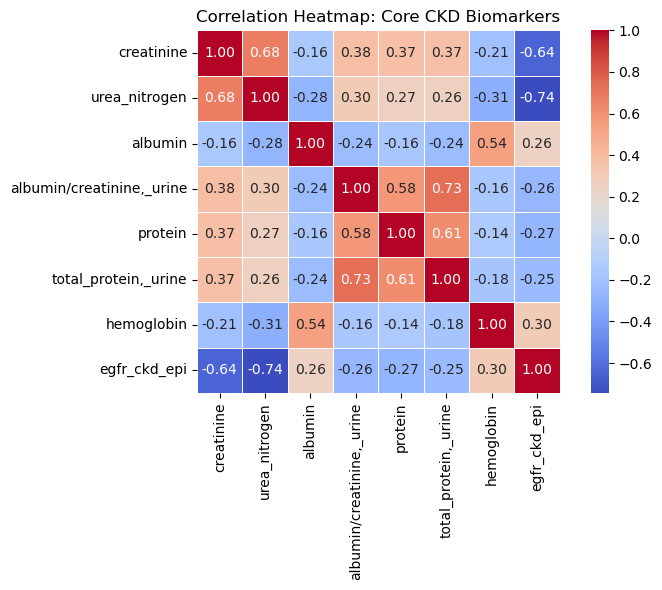

In [17]:
ckd_core_features = [
    'creatinine', 'creatinine_serum', 'urea_nitrogen',
    'albumin', 'albumin/creatinine,_urine',
    'protein', 'total_protein,_urine',
    'hemoglobin', 'egfr_ckd_epi'
]

# Subset + drop missing ones
core_cols = [col for col in ckd_core_features if col in features_df.columns]
corr_core = features_df[core_cols].corr()

# Plot cleaned heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_core, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap: Core CKD Biomarkers')
plt.tight_layout()
plt.show()

Step 5D: Creatinine vs. Age (Colored by Steroid Use)

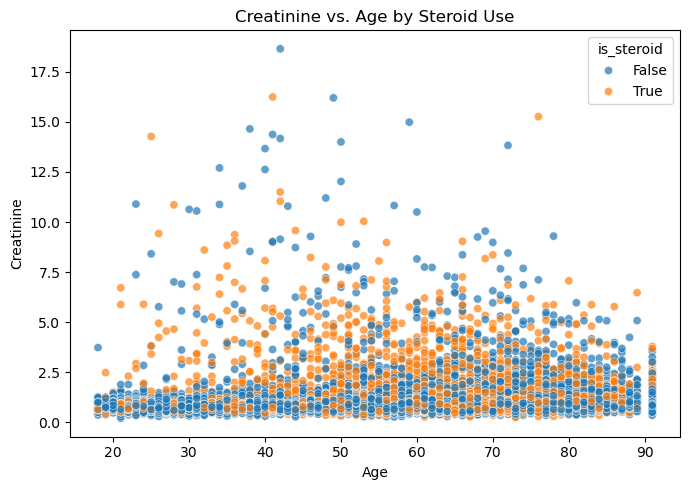

In [18]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=features_df, x='anchor_age', y='creatinine', hue='is_steroid', alpha=0.7)
plt.title('Creatinine vs. Age by Steroid Use')
plt.xlabel('Age')
plt.ylabel('Creatinine')
plt.tight_layout()
plt.show()

Step 5E: Clinical Service Line Distribution

C:\Users\Dell Precision 7530\AppData\Local\Temp\ipykernel_9020\4285650772.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_distribution.values, y=service_distribution.index, palette='muted')


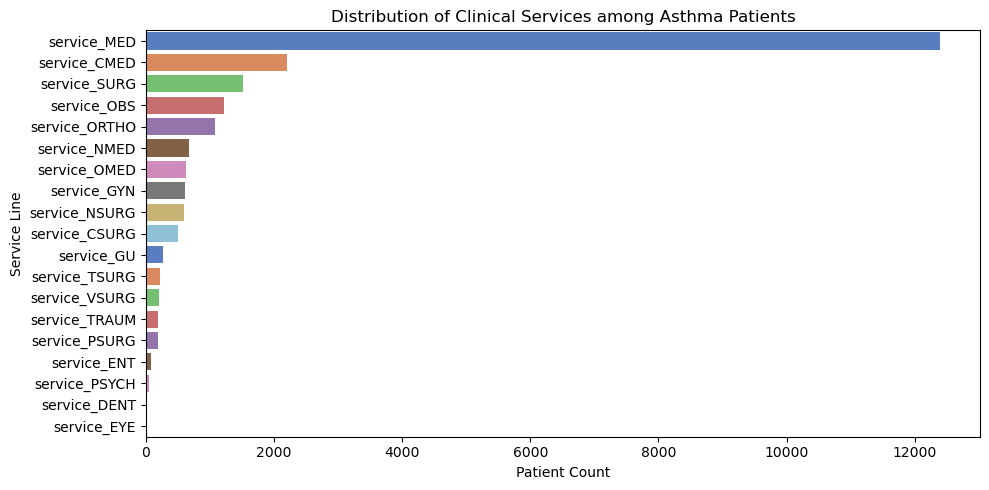

In [19]:
service_cols = [col for col in features_df.columns if col.startswith('service_')]
service_distribution = features_df[service_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=service_distribution.values, y=service_distribution.index, palette='muted')
plt.title('Distribution of Clinical Services among Asthma Patients')
plt.xlabel('Patient Count')
plt.ylabel('Service Line')
plt.tight_layout()
plt.show()

Step 6: Predictive Modeling — Early CKD Detection in Asthma Patients

Step 6A: Define the Target Variable (Binary CKD Label)

In [20]:
# Define binary target: 1 = CKD Stage 3 or worse (eGFR < 60), 0 = Normal/Mild
features_df['ckd_label'] = features_df['egfr_ckd_epi'].apply(lambda x: 1 if x < 60 else 0)

# Check distribution
features_df['ckd_label'].value_counts()

ckd_label
0    18057
1     4586
Name: count, dtype: int64

Step 6B: Select Features + Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

# Drop columns not needed
drop_cols = ['subject_id', 'egfr_ckd_epi', 'ckd_stage', 'ckd_label']
feature_cols = [col for col in features_df.columns if col not in drop_cols and features_df[col].dtype in ['float64', 'int64']]

# Define X and y
X = features_df[feature_cols].fillna(0)  # Fill NA for model input
y = features_df['ckd_label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Step 6C: Train Baseline Models (Random Forest, XGBoost)

Sanitize Column Names

In [30]:
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_train.columns = X_train.columns.str.replace(r"[ ,]", "_", regex=True)

X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[ ,]", "_", regex=True)

In [31]:
X_train.columns[X_train.columns.duplicated()].tolist()

[]

In [32]:
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\Dell Precision 7530\anaconda3\envs\myenv-python-3.9.18\lib\site-packages\xgboost\core.py:158: UserWarning: [16:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Step 6D: Evaluate Model Performance

In [26]:
from sklearn.metrics import classification_report, roc_auc_score

# Random Forest
rf_preds = rf_model.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print("Random Forest:\n", classification_report(y_test, rf_preds))
print("AUC:", rf_auc)

# XGBoost
xgb_preds = xgb_model.predict(X_test)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])
print("XGBoost:\n", classification_report(y_test, xgb_preds))
print("AUC:", xgb_auc)

Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3612
           1       0.90      0.86      0.88       917

    accuracy                           0.95      4529
   macro avg       0.93      0.92      0.92      4529
weighted avg       0.95      0.95      0.95      4529

AUC: 0.9903475148269852
XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3612
           1       0.89      0.89      0.89       917

    accuracy                           0.95      4529
   macro avg       0.93      0.93      0.93      4529
weighted avg       0.95      0.95      0.95      4529

AUC: 0.9927564848058876


Step 6E: Random Forest Feature Importance

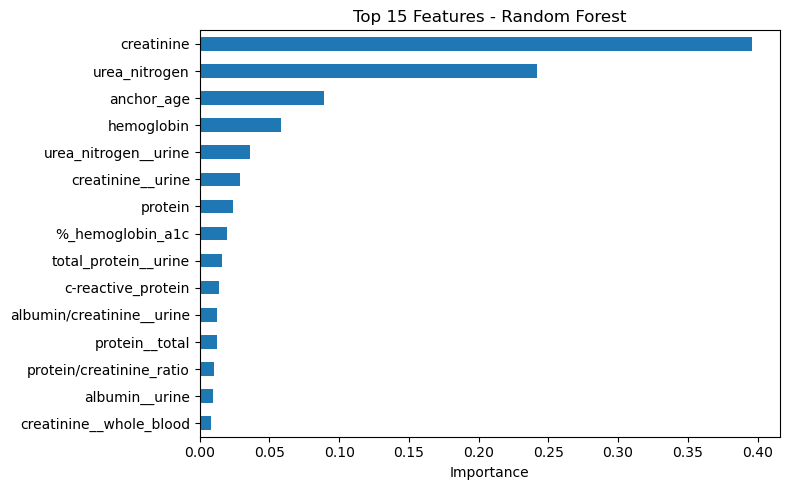

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Corrected: Use X_train.columns
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh')
plt.title("Top 15 Features - Random Forest")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

(Part 2): XGBoost Feature Importance Plot

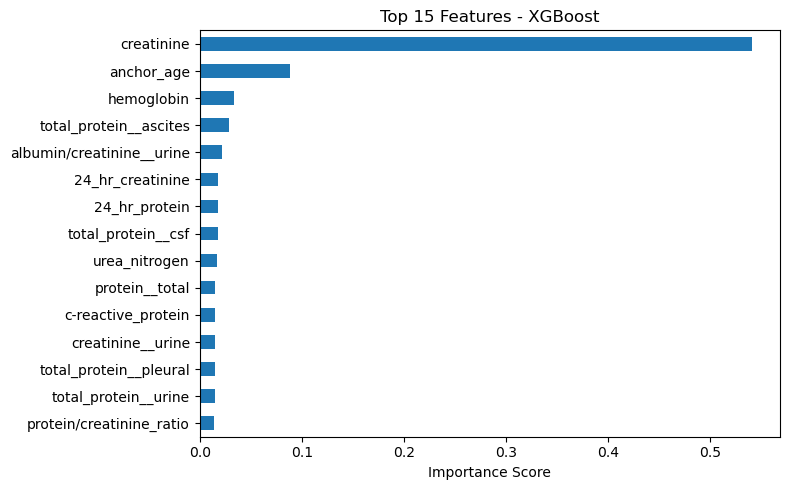

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from XGBoost
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Get top 15 most important features
top_xgb_features = xgb_importances.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(8, 5))
top_xgb_features.plot(kind='barh')
plt.title("Top 15 Features - XGBoost")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [29]:
print("Target variable:", y.name)
print("Feature variables:", X_train.columns.tolist())

Target variable: ckd_label
Feature variables: ['anchor_age', '%_hemoglobin_a1c', '24_hr_creatinine', '24_hr_protein', 'albumin', 'albumin__ascites', 'albumin__body_fluid', 'albumin__joint_fluid', 'albumin__pleural', 'albumin__urine', 'albumin/creatinine__urine', 'alpha-fetoprotein', 'amylase/creatinine_ratio__urine', 'c-reactive_protein', 'carboxyhemoglobin', 'creatinine', 'creatinine_clearance', 'creatinine__ascites', 'creatinine__body_fluid', 'creatinine__pleural', 'creatinine__serum', 'creatinine__urine', 'creatinine__whole_blood', 'fetal_hemoglobin', 'hemoglobin', 'hemoglobin_a2', 'hemoglobin_c', 'hemoglobin_f', 'hemoglobin_other', 'hemoglobin__calculated', 'methemoglobin', 'protein', 'protein_c__antigen', 'protein_c__functional', 'protein_s__antigen', 'protein_s__functional', 'protein__total', 'protein/creatinine_ratio', 'surfactant/albumin', 'total_protein__ascites', 'total_protein__body_fluid', 'total_protein__csf', 'total_protein__joint_fluid', 'total_protein__pleural', 'total_

Experiment 2 - Stratified K-Fold Cross-Validation vs. Train-Test Split

In [55]:
xgb_model_cv = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    tree_method='auto'  # <- Prevents automatic QuantileDMatrix fallback
)

In [56]:
X_cleaned_fixed.columns = [str(col).replace('[','').replace(']','').replace('<','_lt_').replace('>','_gt_') for col in X_cleaned_fixed.columns]

In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_auc_scores = cross_val_score(xgb_model_cv, X_cleaned_fixed.to_numpy(), y.to_numpy(), cv=cv, scoring='roc_auc', n_jobs=-1)
#The conversion to NumPy arrays was required to resolve a known compatibility issue between XGBoost and cross-validation in certain environments.

print("XGBoost AUC Scores (CV):", xgb_auc_scores)
print("Mean AUC:", xgb_auc_scores.mean())

XGBoost AUC Scores (CV): [0.99207265 0.99299741 0.99302301 0.99233833 0.99239842]
Mean AUC: 0.9925659651158494


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Reinitialize Random Forest
rf_model_cv = RandomForestClassifier(random_state=42)

# Run cross-validation
rf_auc_scores = cross_val_score(rf_model_cv, X_cleaned_fixed.to_numpy(), y.to_numpy(),
                                cv=cv, scoring='roc_auc', n_jobs=-1)

# Print results
print("Random Forest AUC Scores (CV):", rf_auc_scores)
print("Mean AUC:", round(rf_auc_scores.mean(), 4))


Random Forest AUC Scores (CV): [0.99038571 0.98976648 0.99077589 0.98892923 0.99009388]
Mean AUC: 0.99


Visualize

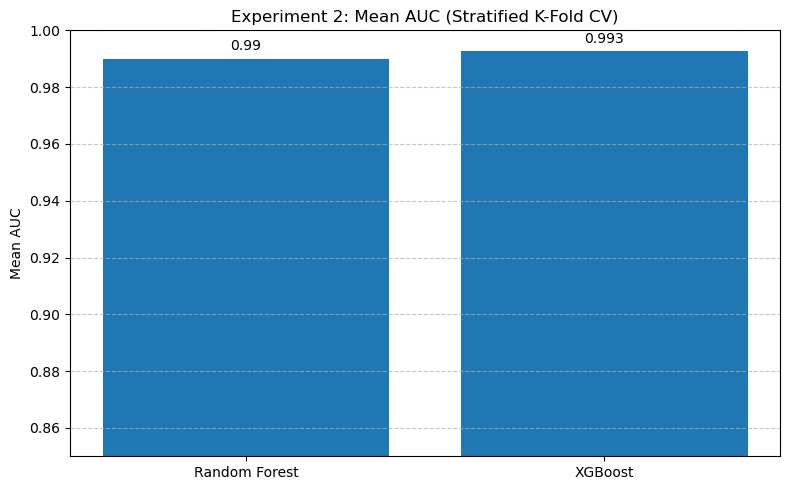

In [69]:
import matplotlib.pyplot as plt
import numpy as np

rf_auc_scores = [0.99038571, 0.98976648, 0.99077589, 0.98892923, 0.99009388]  # Random Forest scores
xgb_auc_scores = [0.99207265, 0.99299741, 0.99302301, 0.99233833, 0.99239842]  # XGBoost scores

# Calculate mean AUCs
rf_mean = np.mean(rf_auc_scores)
xgb_mean = np.mean(xgb_auc_scores)

# Create bar chart
models = ['Random Forest', 'XGBoost']
mean_aucs = [rf_mean, xgb_mean]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, mean_aucs)

# Annotate bars with exact values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, round(yval, 3), 
             ha='center', va='bottom', fontsize=10)

plt.title('Experiment 2: Mean AUC (Stratified K-Fold CV)')
plt.ylabel('Mean AUC')
plt.ylim(0.85, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Experiment 3: Imbalance Handling with SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_fixed, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert to numpy arrays for compatibility with XGBoost
X_train_np = X_train_smote.to_numpy()
y_train_np = y_train_smote.to_numpy()
X_test_np = X_test.to_numpy()

# Train models
rf_smote_model = RandomForestClassifier(random_state=42)
xgb_smote_model = XGBClassifier(eval_metric='logloss', random_state=42)

rf_smote_model.fit(X_train_smote, y_train_smote)  # RandomForest can handle DataFrame
xgb_smote_model.fit(X_train_np, y_train_np)       # XGBoost requires NumPy

# Evaluate
rf_pred = rf_smote_model.predict(X_test)
xgb_pred = xgb_smote_model.predict(X_test_np)

rf_auc = roc_auc_score(y_test, rf_smote_model.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_smote_model.predict_proba(X_test_np)[:, 1])

print("Random Forest after SMOTE:\n")
print(classification_report(y_test, rf_pred))
print(f"AUC: {rf_auc}\n")

print("XGBoost after SMOTE:\n")
print(classification_report(y_test, xgb_pred))
print(f"AUC: {xgb_auc}")

C:\Users\Dell Precision 7530\anaconda3\envs\myenv-python-3.9.18\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Random Forest after SMOTE:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3612
           1       0.85      0.92      0.89       917

    accuracy                           0.95      4529
   macro avg       0.91      0.94      0.93      4529
weighted avg       0.95      0.95      0.95      4529

AUC: 0.9903367968881144

XGBoost after SMOTE:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3612
           1       0.87      0.93      0.90       917

    accuracy                           0.96      4529
   macro avg       0.92      0.95      0.94      4529
weighted avg       0.96      0.96      0.96      4529

AUC: 0.9927483331340702


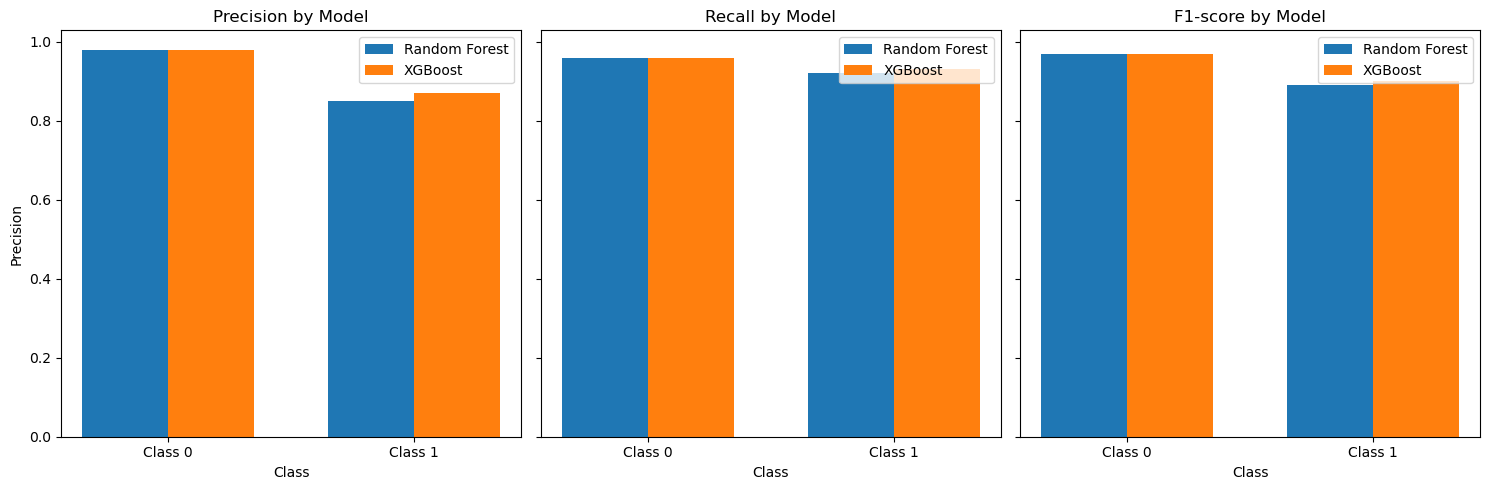

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Models and classes
models = ['Random Forest', 'XGBoost']
classes = ['Class 0', 'Class 1']
metrics = ['Precision', 'Recall', 'F1-score']

# Metric values from results
scores = {
    'Random Forest': {
        'Precision': [0.98, 0.85],
        'Recall':    [0.96, 0.92],
        'F1-score':  [0.97, 0.89]
    },
    'XGBoost': {
        'Precision': [0.98, 0.87],
        'Recall':    [0.96, 0.93],
        'F1-score':  [0.97, 0.90]
    }
}

# Plot setup
n_classes = len(classes)
x = np.arange(n_classes)           # the label locations
width = 0.35                       # the width of the bars

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # extract values for each model
    rf_vals  = scores['Random Forest'][metric]
    xgb_vals = scores['XGBoost'][metric]
    
    # plot bars
    ax.bar(x - width/2, rf_vals,  width, label='Random Forest')
    ax.bar(x + width/2, xgb_vals, width, label='XGBoost')
    
    # styling
    ax.set_title(f'{metric} by Model')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.set_xlabel('Class')
    if idx == 0:
        ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()

Appendix A — Hyperparameter Tuning

🔍 Objective:
To further optimize the predictive performance of both Random Forest and XGBoost classifiers by performing grid search-based hyperparameter tuning using stratified 5-fold cross-validation.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=42),
                     param_grid=rf_grid,
                     scoring='roc_auc',
                     cv=5,
                     n_jobs=-1,
                     verbose=1)

rf_cv.fit(X_train, y_train)

print("Best Random Forest Params:", rf_cv.best_params_)
print("Best AUC:", rf_cv.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC: 0.9900284223027322


In [30]:
from xgboost import XGBClassifier

xgb_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_cv = GridSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
                      param_grid=xgb_grid,
                      scoring='roc_auc',
                      cv=5,
                      n_jobs=-1,
                      verbose=1)

xgb_cv.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_cv.best_params_)
print("Best AUC:", xgb_cv.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Dell Precision 7530\anaconda3\envs\myenv-python-3.9.18\lib\site-packages\xgboost\core.py:158: UserWarning: [15:07:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best AUC: 0.9927622466303596


Step 2: Visualization of Tuning Results

In [31]:
import pandas as pd

# Convert GridSearch results to DataFrame
rf_results = pd.DataFrame(rf_cv.cv_results_)

# Only select useful columns for visualization
rf_results_filtered = rf_results[[
    'param_n_estimators', 
    'param_max_depth', 
    'param_min_samples_split', 
    'param_min_samples_leaf', 
    'mean_test_score'
]]

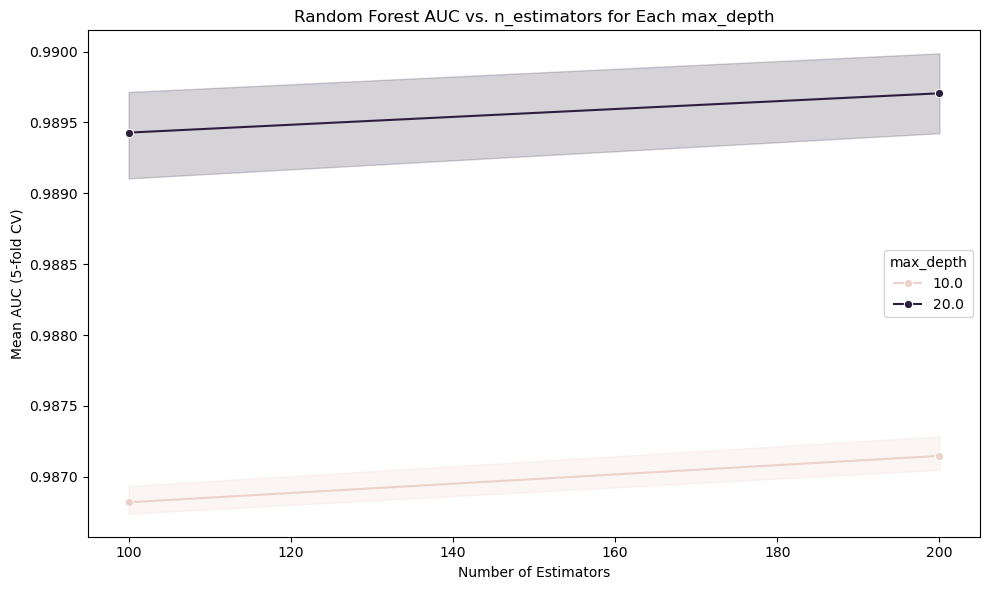

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=rf_results_filtered,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    marker='o'
)
plt.title('Random Forest AUC vs. n_estimators for Each max_depth')
plt.ylabel('Mean AUC (5-fold CV)')
plt.xlabel('Number of Estimators')
plt.legend(title='max_depth')
plt.tight_layout()
plt.show()

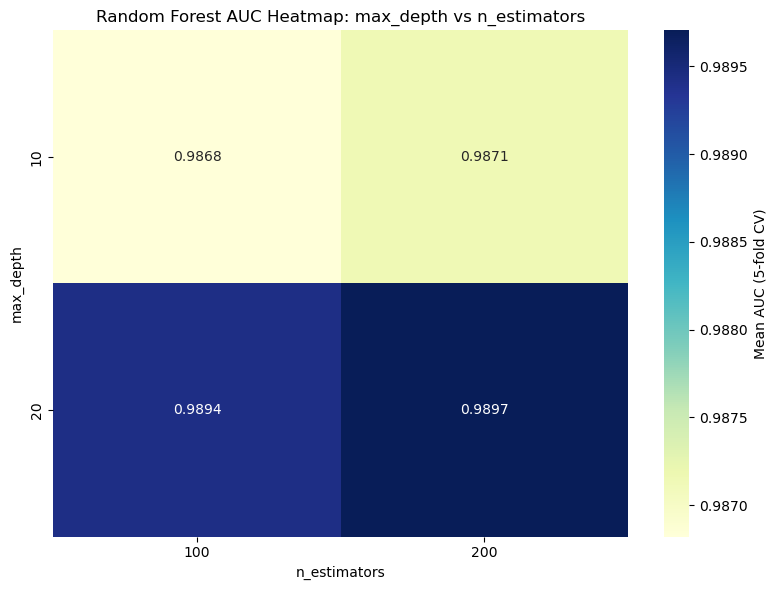

In [33]:
# Pivot data to create heatmap grid
heatmap_data = rf_results_filtered.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".4f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Mean AUC (5-fold CV)'}
)
plt.title('Random Forest AUC Heatmap: max_depth vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()

XGBoost tuning visualizations

In [34]:
# Create a DataFrame from XGBoost tuning results
xgb_results = pd.DataFrame(xgb_cv.cv_results_)

# Filter columns of interest
xgb_results_filtered = xgb_results[[
    'param_n_estimators',
    'param_max_depth',
    'param_learning_rate',
    'param_subsample',
    'param_colsample_bytree',
    'mean_test_score'
]]

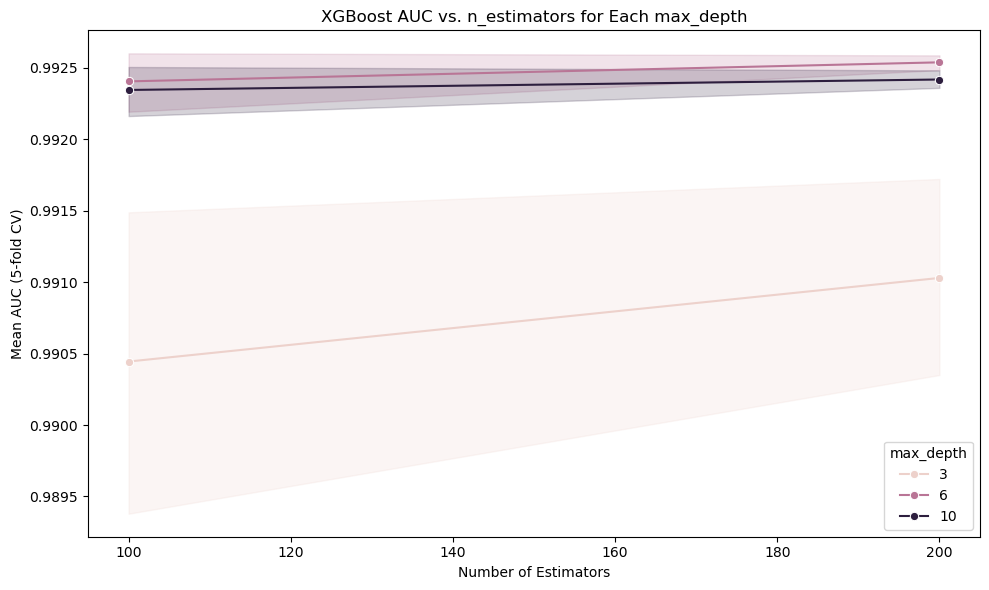

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=xgb_results_filtered,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    marker='o'
)
plt.title('XGBoost AUC vs. n_estimators for Each max_depth')
plt.ylabel('Mean AUC (5-fold CV)')
plt.xlabel('Number of Estimators')
plt.legend(title='max_depth')
plt.tight_layout()
plt.show()

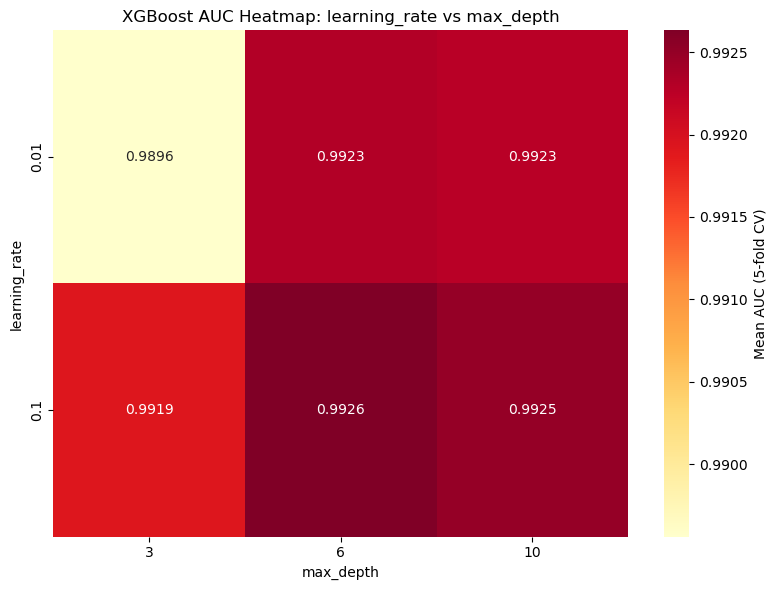

In [36]:
# Pivot for heatmap: mean AUC across learning_rate × max_depth
heatmap_data_xgb = xgb_results_filtered.pivot_table(
    values='mean_test_score',
    index='param_learning_rate',
    columns='param_max_depth'
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data_xgb,
    annot=True,
    fmt=".4f",
    cmap='YlOrRd',
    cbar_kws={'label': 'Mean AUC (5-fold CV)'}
)
plt.title('XGBoost AUC Heatmap: learning_rate vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('learning_rate')
plt.tight_layout()
plt.show()